<a href="https://colab.research.google.com/github/kumarchandan/EIP4/blob/master/EIP4_W3_CIFAR10_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

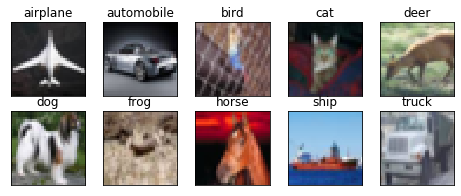

In [26]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [30]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))

model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))

model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))

model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 A

In [31]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_87 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_88 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_72 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 15, 96)      

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':





Epoch 1/50





390/390 [==============================] - 29s 75ms/step - loss: 1.8743 - acc: 0.2860 - val_loss: 1.4423 - val_acc: 0.4656
Epoch 2/50
390/390 [==============================] - 20s 52ms/step - loss: 1.3752 - acc: 0.5025 - val_loss: 1.1538 - val_acc: 0.5817
Epoch 3/50
390/390 [==============================] - 20s 52ms/step - loss: 1.1550 - acc: 0.5914 - val_loss: 1.0213 - val_acc: 0.6413
Epoch 4/50
390/390 [==============================] - 20s 52ms/step - loss: 1.0346 - acc: 0.6376 - val_loss: 0.9101 - val_acc: 0.6808
Epoch 5/50
390/390 [==============================] - 20s 52ms/step - loss: 0.9312 - acc: 0.6777 - val_loss: 0.8840 - val_acc: 0.6906
Epoch 6/50
390/390 [==============================] - 20s 52ms/step - loss: 0.8553 - acc: 0.7033 - val_loss: 0.8274 - val_acc: 0.7131
Epoch 7/50
390/390 [==============================] - 20s 52ms/step - loss: 0.7999 - acc: 0.7267 - val_loss: 0.7242 - val_acc: 0.7497
Epoch 8/50
390/390 [==============================] - 

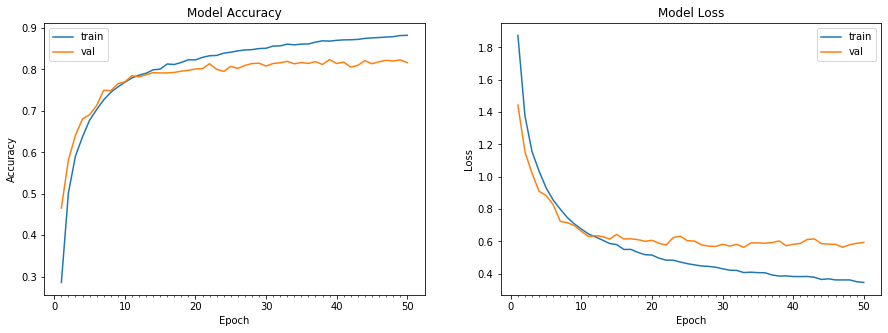

Accuracy on test data is: 81.64


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Assignment 3:

1. Run this (Links to an external site.) network (base network) for 50 epochs, report Validation Accuracy after 50 epochs. 
2. Add new cells at the bottom of the code, and write your own network such that:
 - it uses depthwise separable convolution ONLY (no Conv2D)
 - it uses BatchNormalization 
 - has less than 100,000 parameters
 - it uses proper dropout values
 - you've mentioned the output size for each layer
 - you've mentioned the receptive field for each layer
 - runs for 50 epochs
 - beats the validation score within 50 epochs (at any epoch run, doesn't need to be final one)

In [0]:
model2 = Sequential();

# def buildConv2DBlock1Network(model, no_of_channels=32, kernel_size=3, input_shape=(32, 32, 3)):
#   for i in range(5):
#     model.add()

model2.add(SeparableConv2D(64, 3, input_shape=(32, 32, 3))) # 32, 3
model2.add(Activation('relu'))
model2.add(BatchNormalization())

model2.add(SeparableConv2D(128, 3)) # 30, 5
model2.add(Activation('relu'))
model2.add(BatchNormalization())

model2.add(MaxPooling2D(pool_size=(2, 2))) # 15, 5
model2.add(Dropout(0.1))

model2.add(SeparableConv2D(64, 3)) # 13, 9
model2.add(Activation('relu'))
model2.add(BatchNormalization())

model2.add(SeparableConv2D(128, 3)) # 11, 13
model2.add(Activation('relu'))
model2.add(BatchNormalization())

# model2.add(SeparableConv2D(256, 3)) # 9, 24
# model2.add(Activation('relu'))
# model2.add(BatchNormalization())
# model2.add(Dropout(0.1))

model2.add(MaxPooling2D(pool_size=(2, 2))) # 5, 15
model2.add(Dropout(0.1))

model2.add(SeparableConv2D(64, 3)) # 3, 23
model2.add(BatchNormalization())
model2.add(Activation('relu'))

model2.add(SeparableConv2D(128, 3)) # 3, 23
model2.add(Flatten())
# model2.add(GlobalMaxPooling2D())
model2.add(Dense(num_classes, activation='softmax'))

# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [33]:
model2.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_79 (Separab (None, 30, 30, 64)        283       
_________________________________________________________________
activation_95 (Activation)   (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_60 (Batc (None, 30, 30, 64)        256       
_________________________________________________________________
separable_conv2d_80 (Separab (None, 28, 28, 128)       8896      
_________________________________________________________________
activation_96 (Activation)   (None, 28, 28, 128)       0         
_________________________________________________________________
batch_normalization_61 (Batc (None, 28, 28, 128)       512       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 14, 14, 128)     

Epoch 1/50
  1/390 [..............................] - ETA: 46s - loss: 0.3956 - acc: 0.8594

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=50, validation_data=(array([[[..., verbose=1, steps_per_epoch=390)`
  # Remove the CWD from sys.path while we load stuff.


390/390 [==============================] - 34s 88ms/step - loss: 0.5058 - acc: 0.8223 - val_loss: 0.7045 - val_acc: 0.7663
Epoch 2/50
390/390 [==============================] - 34s 88ms/step - loss: 0.4895 - acc: 0.8263 - val_loss: 0.6895 - val_acc: 0.7715
Epoch 3/50
390/390 [==============================] - 34s 88ms/step - loss: 0.4773 - acc: 0.8307 - val_loss: 0.6979 - val_acc: 0.7719
Epoch 4/50
390/390 [==============================] - 34s 88ms/step - loss: 0.4691 - acc: 0.8346 - val_loss: 0.6754 - val_acc: 0.7773
Epoch 5/50
390/390 [==============================] - 34s 87ms/step - loss: 0.4590 - acc: 0.8369 - val_loss: 0.6781 - val_acc: 0.7788
Epoch 6/50
390/390 [==============================] - 34s 88ms/step - loss: 0.4457 - acc: 0.8404 - val_loss: 0.6825 - val_acc: 0.7733
Epoch 7/50
390/390 [==============================] - 34s 87ms/step - loss: 0.4364 - acc: 0.8447 - val_loss: 0.7101 - val_acc: 0.7707
Epoch 8/50
390/390 [==============================] - 34s 87ms/step - los

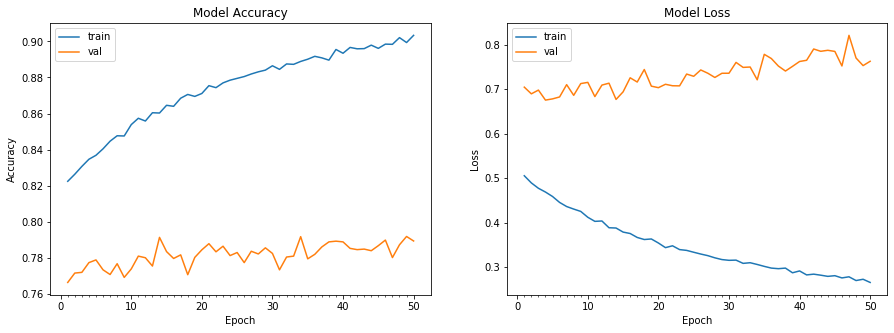

Accuracy on test data is: 78.93


In [35]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, horizontal_flip=False)

# train the model
start = time.time()
# Train the model
model_info = model2.fit_generator(datagen.flow(train_features, train_labels, batch_size=128),
                                  samples_per_epoch=train_features.shape[0], epochs=50,
                                  validation_data=(test_features, test_labels), verbose=1)
end = time.time()
print('Model took %0.2f seconds to train'%(end - start))
# plot model history
plot_model_history(model_info)
# Compute test accuracy
print('Accuracy on test data is: %0.2f'%accuracy(test_features, test_labels, model2))